<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/master/Assignment/Assignment_BIA_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORT YOUR LIBRARIES HERE
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Business and Intelligence Analytics personal assignment

Welcome to the BIA personal assignment!

You will have to implement regression and classification algorithms, applying these methods to the topics of agriculture, food, water, and health. More precisely, you will try to:
- Predict crop yields using data on weather and fertilizer use.
- Predict the potability of water using data on the mineral and micro-organisms content of water.

Once you are done you have to submit your notebook on moodle. The deadline of the submission is on __May 19th at 23:59__.

If there is need for further clarifications on the questions, after the assignment is released, we will update this file, so make sure you check the git repository for updates.

Good luck!

#1- Linear regression: predicting crop yields

In 2022, between 735 million persons worldwide were suffering from hunger (see [SDG Goal 2](https://www.un.org/sustainabledevelopment/hunger/) Zero Hunger). Given the ongoing growth of the world population, it is imperative to comprehend crop yield at a global level in order to tackle food security issues and mitigate the effects of climate change.

The Agricultural yield depends on weather conditions (rain, temperature, etc) and fertilizers use. Having precise information regarding the historical crop yield is critical for making informed decisions regarding agricultural risk management and future projections.

Some publications on the topic of food:
- [Threats to Nitrogen Fertilizer, Opportunities to Cultivate Sustainable Practices?](https://e4s.center/resources/reports/threats-to-nitrogen-fertilizer-opportunities-to-cultivate-sustainable-practices/)
- [True cost of food as a lever to transform the Swiss food system](https://e4s.center/resources/reports/true-cost-of-food-as-a-lever-to-transform-the-swiss-food-system/)

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Sustainable_Development_Goal_02ZeroHunger.svg/800px-Sustainable_Development_Goal_02ZeroHunger.svg.png' width="200">

We will use data obtained from the [FAO](http://www.fao.org/home/en/) (Food and Agriculture Organization) and [World Data Bank](https://data.worldbank.org/), and gathered in the [Crop Yield Prediction Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset).

Our goal is to predict the crop yields using the _temperature_, _rain fall_, and _type of crops_.


## 1.1 Load and Discover the dataset

Load the data in a pandas dataframe. The url link is provided below. Display the first 10 observations and the types of data.

In [ ]:
url_yield = 'https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/yield_df.csv'
df = pd.read_csv(url_yield)
df.head(10)


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37
5,Albania,Wheat,1990,30197,1485,121.0,16.37
6,Albania,Maize,1991,29068,1485,121.0,15.36
7,Albania,Potatoes,1991,77818,1485,121.0,15.36
8,Albania,"Rice, paddy",1991,28538,1485,121.0,15.36
9,Albania,Sorghum,1991,6667,1485,121.0,15.36


In [ ]:
df.dtypes

Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year      int64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

#### Question 1
Print the list of countries (`Area`) and years available in the dataset. How many unique countries do we have in this dataset?

In [ ]:
# YOUR CODE HERE
print(df['Area'].unique())
print(len(df['Area'].unique()))
print(df['Year'].unique())


['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'Suriname' 'Sweden'
 'Switzerland' 'Tajikistan

#### Question 2
Print the list of unique items in the `Item` column of the dataset. You should obtain a list of 10 crops. Which corp is the __most frequent__ in this dataset?

In [ ]:
# YOUR CODE HERE
items = df['Item'].unique()
print(items, len(items))
print(df['Item'].value_counts())

['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams'] 10
Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64


#### Question 3
We Are interested to know the total yield of "Wheat" in each country in the year 2010. Create a new dataframe that contains the total (sum) of `hg/ha_yield` for each country in the year 2010. Which country had the __highest yield of Wheat__ in the year 2010?

In [ ]:
df_q3 = df[(df["Year"]==2010)&(df["Item"]=="Wheat")]
df_q3.groupby("Area").agg({"hg/ha_yield": sum, "Year": min}).sort_values("hg/ha_yield", ascending=False)

,hg/ha_yield,Year
Area,,
India,624690,2010
Mexico,433480,2010
United Kingdom,383730,2010
Brazil,311168,2010
Pakistan,229752,2010
...,...,...
Eritrea,11786,2010
Angola,10526,2010
Thailand,8756,2010


Display summary statistics for the columns: `hg/ha_yield`, `average_rain_fall_mm_per_year`, `pesticides_tonnes`,`avg_temp`. How many observations do we have?

*Hint:* You can extract the columns `hg/ha_yield`, `average_rain_fall_mm_per_year`, `pesticides_tonnes`,`avg_temp` in a new dataframe since we will reuse it in the following questions. hg/ha_yield indicates how many hectograms (hundreds of grams) of crop were produced on one hectare of land.

In [ ]:
# YOUR CODE HERE
num_cols = df[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp']]
num_cols.describe()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.00000,28242.000000,28242.000000
mean,77053.332094,1149.05598,37076.909344,20.542627
std,84956.612897,709.81215,59958.784665,6.312051
min,50.000000,51.00000,0.040000,1.300000
25%,19919.250000,593.00000,1702.000000,16.702500
50%,38295.000000,1083.00000,17529.440000,21.510000
75%,104676.750000,1668.00000,48687.880000,26.000000
max,501412.000000,3240.00000,367778.000000,30.650000


#### Question 4
Display a heatmap of the correlation matrix between the columns: `hg/ha_yield`, `average_rain_fall_mm_per_year`, `pesticides_tonnes`, `avg_temp`. Which pair of varibales (columns) have the __highest correlation__?

Text(0.5, 1.0, 'Heatmap of correlations between selected columns')

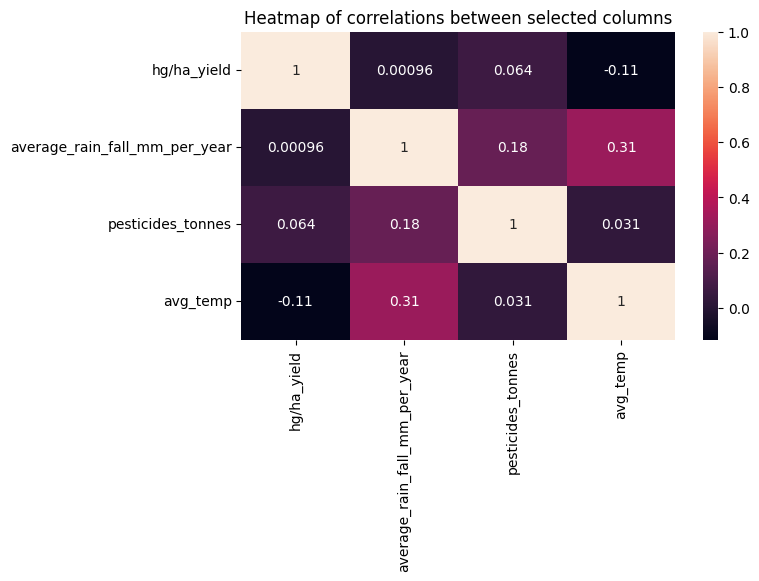

In [ ]:
# YOUR CODE HERE
fig=plt.figure(figsize=(7,4))

heat_map = num_cols.corr()
sb= sns.heatmap(data = heat_map, annot=True)
plt.title('Heatmap of correlations between selected columns')

Create a boxplot of the columns: `hg/ha_yield`, `average_rain_fall_mm_per_year`, `pesticides_tonnes`, `avg_temp`.

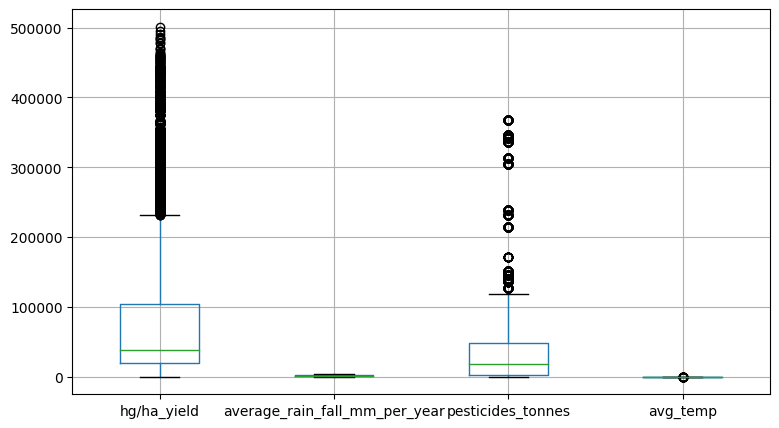

In [ ]:
# YOUR CODE HERE
fig=plt.figure(figsize=(9,5))
box_plot=num_cols.boxplot()

- Feel free to pursue your exploration to better understand your dataset. Although not graded, this might help you better understanding the problem and answer the following questions.

In [ ]:
# YOUR CODE HERE


## 1.2: Multivariate regression

We will try to predict the crop yields (column `hg/ha_yield`) using the features: `Item`, `average_rain_fall_mm_per_year`, `pesticides_tonnes`, and `avg_temp`.

Extract your features and target variables, i.e., X and y variables.

In [ ]:
# YOUR CODE HERE
X = df[['Item', 'average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp']]
y = df[['hg/ha_yield']]

Encode the column `Item` using `OneHotEncoder`. After doing the one-hot encoding, you have to remove the `Item` column and add the columns resulting from the one-hot encoding to the dataframe.

__Note:__ TO perform one-hot encoding you can either use sklearn `OneHotEncoder` or the `getdummies` method from pandas.

In [ ]:
# YOUR CODE HERE
X = pd.get_dummies(X, columns=["Item"])


Split between training and test set.

__Important:__ To ensure reproducibility, you have to use the following values for the `train_test_split` function:

`test_size=0.2`, `random_state=42`, `shuffle=True`

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Rescale both the features of the training and test datasets (`X_train`, `X_test`) and also the target values for training and test (`y_train`, `y_test`) using `MinMaxScaler`.

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler = MinMaxScaler()

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)



Build and train a multivariate linear regression model.

In [ ]:
# YOUR CODE HERE
# 1. Set up the model
model = LinearRegression()
# 2. Use fit
model.fit(X_train, y_train)


LinearRegression()

#### Question 5

What is the $R^2$, mean absolute error, and mean square error on the test set?

__Important:__ To answer the corresponding question in the quiz correctly, you have to follow the above steps (one-hot encoding, train-test split with the given parameters, and min-max rescaling) exactly as instructed.

In [ ]:
# YOUR CODE HERE
predictions = model.predict(X_test)

#Check the score/accuracy
print("MAE %.3f" % mean_absolute_error(y_test, predictions))
print("MSE %.3f" % mean_squared_error(y_test, predictions))
print("R^2 %.3f" % r2_score(y_test, predictions))

MAE 0.063
MSE 0.010
R^2 0.646


#### Question 6
Now, we would like to observe the effect of removing some of the features from the training on the performance of the linear regression model. Train 4 different liner regressions using the 4 datasets below. Each dataset only has a subset of the features:
- `average_rain_fall_mm_per_year`, `pesticides_tonnes`,`avg_temp`
- `pesticides_tonnes`,`avg_temp`
- `average_rain_fall_mm_per_year`,`avg_temp`
- `average_rain_fall_mm_per_year`, `pesticides_tonnes`

Make sure that you split each dataset to train and test using the same parameters (`test_size=0.2`, `random_state=42`, `shuffle=True`) and rescale the features and the target variable using min-max scaler. Training the linear regression on which of the subsets of the features leads to the __smallest mean-squared error__?

In [ ]:
X1 = X[['average_rain_fall_mm_per_year', 'pesticides_tonnes','avg_temp']]
X2 = X[['pesticides_tonnes','avg_temp']]
X3 = X[['average_rain_fall_mm_per_year','avg_temp']]
X4 = X[['average_rain_fall_mm_per_year', 'pesticides_tonnes']]

for X_temp in [X1, X2, X3, X4]:
  X_tr, X_te, y_tr, y_te = train_test_split(X_temp, y, test_size=0.2, random_state=42, shuffle=True)
  scaler = MinMaxScaler()
  X_tr = scaler.fit_transform(X_tr)
  X_te = scaler.transform(X_te)

  scaler = MinMaxScaler()
  y_tr = scaler.fit_transform(y_tr)
  y_te = scaler.transform(y_te)

  model = LinearRegression()
  model.fit(X_tr, y_tr)
  predictions = model.predict(X_te)
  print("MSE %.3f" % mean_squared_error(y_te, predictions))







MSE 0.028
MSE 0.028
MSE 0.028
MSE 0.029


## 1.3 Polynomial features regression


Next, We will try to improve the performance of our model using Polynomial Features. We will only use the numerical features in this part, i.e., `average_rain_fall_mm_per_year`, `pesticides_tonnes`,`avg_temp`.

Write a function that gets as inputs the degree of polynomial features (an integer), the training and test sets (features and target variables), and return the mean absolute error and mean square error of a polynomial feature regression on the test set.

*Hint*: Your function should transform your training and test set to integrate polynomial features, then train your model, and then calculate predictions on the test set and return error metrics.

*Hint*: You have to use the `PolynomialFeatures` class from sklearn.

In [ ]:
# YOUR CODE HERE
def poly_regression(d, X_tr, X_te, y_tr, y_te):
  poly = PolynomialFeatures(d)
  X_tr = poly.fit_transform(X_tr)
  X_te = poly.transform(X_te)
  model = LinearRegression()
  model.fit(X_tr, y_tr)
  predictions = model.predict(X_te)
  print("MSE %.4f" % mean_squared_error(y_te, predictions))
  print("MAE %.4f" % mean_absolute_error(y_te, predictions))


#### Question 7

Run the polynomial regression models with degrees ranging from 2 to 6, i.e., in Python `range(2, 7)`. Use the training and test set you build in the above section or perform the split again using the parameters `test_size=0.2`, `random_state=42`, `shuffle=True`. Remember that for this part, You only have to use the features `average_rain_fall_mm_per_year`, `pesticides_tonnes`,`avg_temp`. Which polynomial degree results in the smallest mean squared error on the test set?

In [ ]:
# YOUR CODE HERE
for d in range(2, 7):
  print("degree: ", d)
  poly_regression(d, X_train[:, :3], X_test[:,:3], y_train, y_test)
  print("---")

degree:  2
MSE 0.0278
MAE 0.1273
---
degree:  3
MSE 0.0267
MAE 0.1252
---
degree:  4
MSE 0.0263
MAE 0.1250
---
degree:  5
MSE 0.0260
MAE 0.1243
---
degree:  6
MSE 0.0257
MAE 0.1237
---


# 2. Classification

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. However, for at least 3 billion people, the quality of the water they depend on is unknown due to a lack of monitoring (see [SDG Goal 6](https://sdgs.un.org/goals/goal6) "Ensure availability and sustainable management of water and sanitation for all").

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Sustainable_Development_Goal_6.png/800px-Sustainable_Development_Goal_6.png' width="200">

We will use data from the [Water Quality](https://www.kaggle.com/datasets/mssmartypants/water-quality) dataset to try to predict whether the water is safe to drink depending on the concentration of various minerals and microorganisms. Check the webpage to read a description of the features and get a better understanding of our problem.

## 2.1 Load and Discover the dataset

Load the data in a pandas dataframe. The url link is provided below. Display the first 10 observations and the types of data

In [ ]:
url_water = 'https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/waterQuality1.csv'

# YOUR CODE HERE
water_df = pd.read_csv(url_water)
water_df.head(10)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
6,2.36,5.60,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,0.021,18.60,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0
7,3.93,19.87,0.04,0.66,0.001,6.22,0.10,1.86,0.86,0.16,...,0.197,13.65,1.81,0.001,53.35,7.24,0.08,0.08,0.07,0
8,0.60,24.58,0.01,0.71,0.005,3.14,0.77,1.45,0.98,0.35,...,0.167,14.66,1.84,0.004,23.43,4.99,0.08,0.25,0.08,1
9,0.22,16.76,0.02,1.37,0.007,6.40,0.49,0.82,1.24,0.83,...,0.109,4.79,1.46,0.010,30.42,0.08,0.03,0.31,0.01,1


In [ ]:
water_df.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

#### Question 8
Display the correlation heatmap of the columns of this dataset. Which feature in this dataset has the __highest correlation__ with the `is_safe` feature?

*Hint*: You do not necessarily need to look at the heatmap plot to compare the correlation values. You can compare the correlation values by directly looking at the correlation dataframe.

Text(0.5, 1.0, 'Heatmap of correlations')

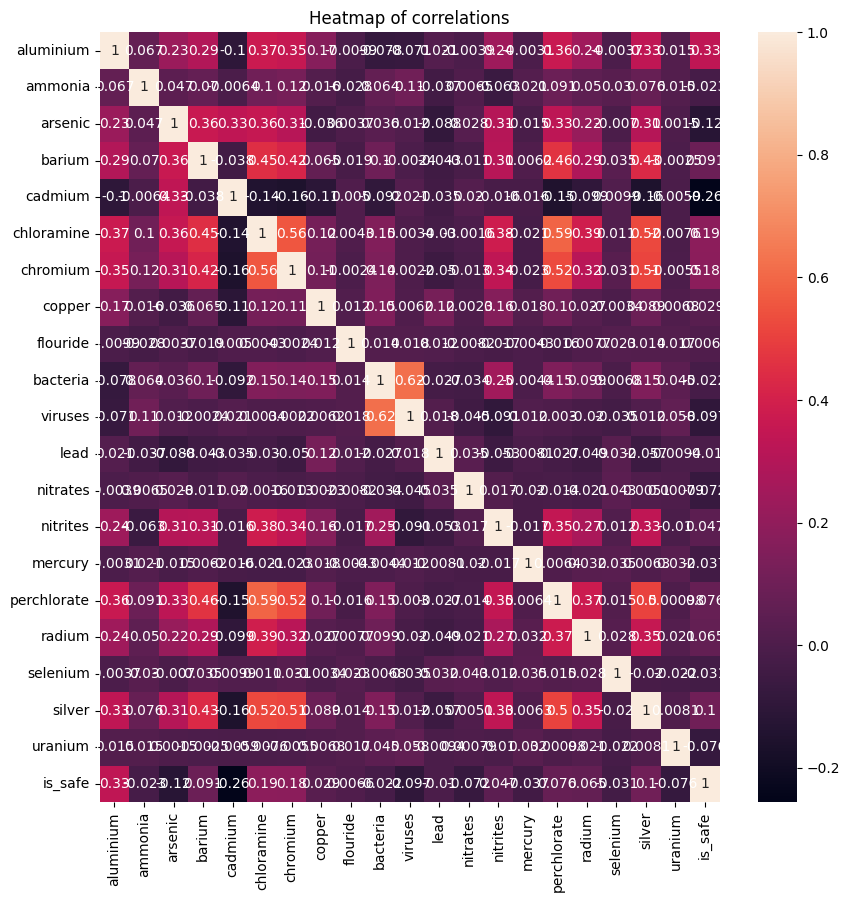

In [ ]:
# YOUR CODE HERE
fig=plt.figure(figsize=(10,10))

heat_map = water_df.corr()
sb= sns.heatmap(data = heat_map, annot=True)
plt.title('Heatmap of correlations')

In [ ]:
heat_map[["is_safe"]].sort_values("is_safe", ascending=False)

,is_safe
is_safe,1.000000
aluminium,0.333974
chloramine,0.186704
chromium,0.182306
silver,0.102813
barium,0.090858
perchlorate,0.075735
radium,0.064743
nitrites,0.046986
copper,0.029498


Feel free to pursue your exploration to better understand your dataset. Although not graded, this might help you better understanding the problem and answer the following questions.

In [ ]:
# YOUR CODE HERE


## 2.2 Preprocessing

Our goal in this section is to predict the class "is_safe", using all the other features.

Extract the features and the target variable X and y. How many observations do we have of class 0 and of class 1? What is the base rate for this classification problem?

In [ ]:
# YOUR CODE HERE
X = water_df.drop("is_safe", axis=1)
y = water_df["is_safe"]

print(y.value_counts())
print("base rate %.4f" %(y.value_counts().iloc[0]/len(y)))

is_safe
0    7084
1     912
Name: count, dtype: int64
base rate 0.8859


Split the dataset into training and test sets.

__Important__: Use the following values for the train_test_split function: `test_size=0.2`, `random_state=42`, `shuffle=True`. Use the `stratify` argument and set it equal to the y (target variable) to ensure a balanced split of target labels between the training and test sets.

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

Rescale the features using `StandardScaler`.

In [ ]:
# YOUR CODE HERE
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2.3 Logistic Regression

Train a logistic regression classifier. Set the following values for the arguments of the Logistic Regression class:

```penalty='l2', solver='lbfgs', max_iter=1000, random_state=42```

In [ ]:
# YOUR CODE HERE
lr = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42)

lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Question 10
Compute the accuracy on the training and test set. Is the test accuracy better than the base rate?

__Important__: to answer this question correctly on Moodle quiz, you have to precisely follow the above instructions for train-test splitting and training the model (Use the values provided for the arguments).

In [ ]:
# YOUR CODE HERE
print("test accuracy: %.4f" %lr.score(X_test, y_test))

test accuracy: 0.9087


#### Question 11

Plot a heatmap of the confusion matrix you compute for the predictions on
the test data. Class 1 is the positive class. How many false positive did we obtain?

[[1394   24]
 [ 122   60]]


Text(50.722222222222214, 0.5, 'true labels')

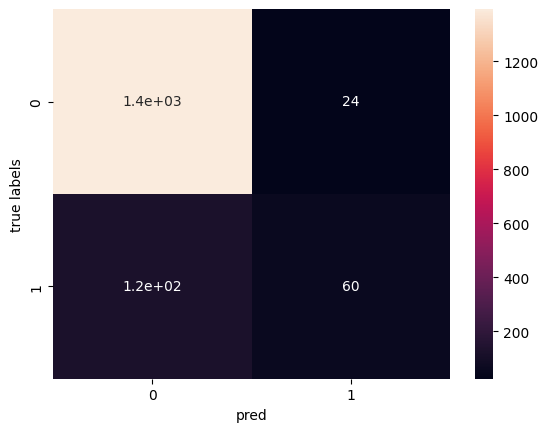

In [ ]:
# YOUR CODE HERE
conf_mat = confusion_matrix(y_test, lr.predict(X_test))
print(conf_mat)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("pred")
plt.ylabel("true labels")

Train a logistic regression classifier with cross-validation. Use 5 folds and 9 values in the logsclae between $10^{-4}$ and $10^4$ for the regularizer parameter. For the rest of the arguments, we use the same values as we used for the logistic regression with no cross validation.

__Important:__ Set the following values for the arguments:
```
penalty='l2', solver='lbfgs', max_iter=1000, random_state=42, cv=5, Cs=*9*
```

In [ ]:
# YOUR CODE HERE
lr_cv = LogisticRegressionCV(penalty='l2', solver='lbfgs', max_iter=1000, random_state=42, cv=5, Cs=9)

lr_cv.fit(X_train, y_train)

LogisticRegressionCV(Cs=9, cv=5, max_iter=1000, random_state=42)

#### Question 12

What is the value of the regularizer parameter for the best Logistic Regression model? What is the accuracy of the best model on the test data?

In [ ]:
print(lr_cv.C_)
print(lr_cv.score(X_test, y_test))

[100.]
0.90875


Using the sklearn `classification_report` function, compute the precision, recall, and f1 score of class 1 and class 0 for the best model on the test data?

In [ ]:
# YOUR CODE HERE
print(classification_report(y_test, lr_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1418
           1       0.71      0.33      0.45       182

    accuracy                           0.91      1600
   macro avg       0.82      0.66      0.70      1600
weighted avg       0.90      0.91      0.89      1600



## 2.4 KNN classifier

Train a KNN classifier on the training dataset. Use the following values for the arguments of the KNN classifier:
```
n_neighbors=7, p=2, weights='uniform', algorithm="kd_tree"
```

In [ ]:
# YOUR CODE HERE
knn = KNeighborsClassifier(n_neighbors=7, p=2, weights='uniform', algorithm="kd_tree")
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

0.919375


#### Question 13
Use `GridSearchCV` to find the best hyper-parameters for your KNN model. Use values between 1 and 10 for `n_neighbors` argument and use either 'uniform' or 'distance' for the `weights` argument. Use a 5-fold cross validation. This translate to the following values for the arguments of the `GridSearchCV`:
```
param_grid={"n_neighbors": range(1, 11), "weights":["uniform", "distance"]}, cv=5
```

What is the accuracy of the best KNN model on the test data?

In [ ]:
# YOUR CODE HERE
grid_search_knn = GridSearchCV(estimator=knn,
             param_grid={"n_neighbors": range(1, 11), "weights":["uniform", "distance"]},
             cv=5,
             )

grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7),
             param_grid={'n_neighbors': range(1, 11),
                         'weights': ['uniform', 'distance']})

In [ ]:
grid_search_knn.score(X_test, y_test)

0.913125

#### Question 14

What are the `n_neighbors` and `weights` values for the best KNN model?

In [ ]:
grid_search_knn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

Plot a heatmap of the confusion matrix on the test set for the best KNN model. Using the sklearn `classification_report` function, compute the accuracy of the best KNN model on the test set as well as its precision, recall, and f1 score for both class 1 and 0.

[[1397   21]
 [ 118   64]]


Text(50.722222222222214, 0.5, 'true labels')

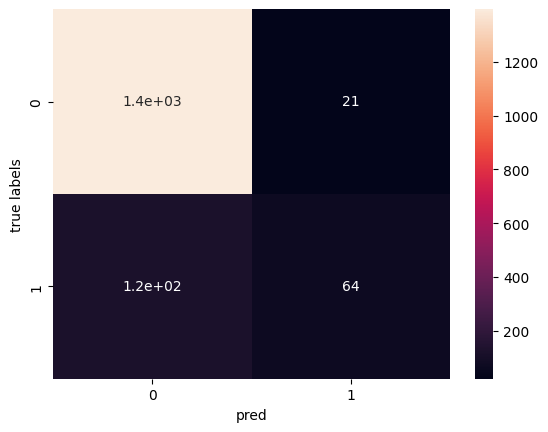

In [ ]:
conf_mat = confusion_matrix(y_test, grid_search_knn.best_estimator_.predict(X_test))
print(conf_mat)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("pred")
plt.ylabel("true labels")

In [ ]:
print(classification_report(y_test, grid_search_knn.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1418
           1       0.75      0.35      0.48       182

    accuracy                           0.91      1600
   macro avg       0.84      0.67      0.72      1600
weighted avg       0.90      0.91      0.90      1600



### Question 10: Decision Trees

Train a Decision Tree classifier on the trainig data. Use the following values for the arguments of the decision tree:
```
criterion="gini", max_depth=3, random_state=42
```

In [ ]:
# YOUR CODE HERE
dtree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
dtree.score(X_test, y_test)

0.940625

#### Question 15
Use `GridSearchCV` to find the best hyper-parameters for your decision tree model. Use values between 1 and 7 for `max_depth` argument and use either 'gini' or 'entropy' for the `criterion` argument. Use a 5-fold cross validation. This translate to the following values for the arguments of the `GridSearchCV`:
```
param_grid={"max_depth": range(1, 8), "criterion":["gini", "entropy"]}, cv=5
```

What is the accuracy of the best decision tree model on the test data?


In [ ]:
# YOUR CODE HERE
grid_search_dtree = GridSearchCV(dtree,
                                 param_grid={"max_depth": range(1, 8), "criterion":["gini", "entropy"]},
                                 cv=5)

grid_search_dtree.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 8)})

In [ ]:
grid_search_dtree.best_estimator_.score(X_test, y_test)

0.966875

#### Question 16
What are 'criterion' and 'max_depth' values for the best decision tree model?


In [ ]:
grid_search_dtree.best_params_

{'criterion': 'entropy', 'max_depth': 7}

Plot a heatmap of the confusion matrix on the test set for the best decision tree model. Using the sklearn `classification_report` function, compute the accuracy of the best decision tree model on the test set as well as its precision, recall, and f1 score for both class 1 and 0.

[[1405   13]
 [  40  142]]


Text(50.722222222222214, 0.5, 'true labels')

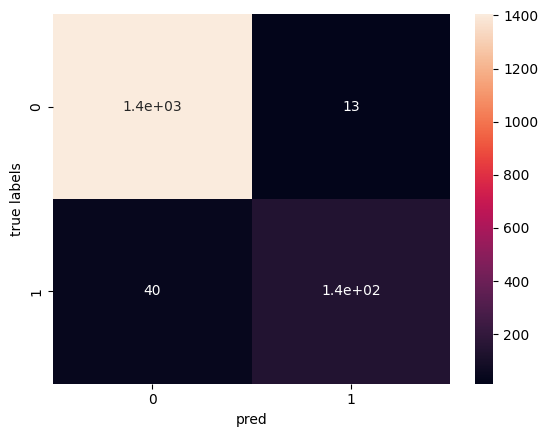

In [ ]:
# YOUR CODE HERE
conf_mat = confusion_matrix(y_test, grid_search_dtree.best_estimator_.predict(X_test))
print(conf_mat)
sns.heatmap(conf_mat, annot=True)
plt.xlabel("pred")
plt.ylabel("true labels")

In [ ]:
print(classification_report(y_test, grid_search_dtree.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1418
           1       0.92      0.78      0.84       182

    accuracy                           0.97      1600
   macro avg       0.94      0.89      0.91      1600
weighted avg       0.97      0.97      0.97      1600



#### Question 17
In this particular problem (predicting whether the water is safe or not) it is important for us to be as precise as possible when predicting a water sample is safe (when predicting class 1). Given this criterion, what is the best option among the 3 model you trained, i.e., logistic regression, KNN classifier, and decision tree?

### Congrats, you are done with the assignment!

